# Project-Week-2-Barcelona

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset observations

<font color=blue>***Dataset is 2019_ine_nacionalitat_per_sexe.csv file***</font>

In [4]:
data = pd.read_csv('../datasets/3.-population/2019_ine_nacionalitat_per_sexe.csv')

In [5]:
data

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Nacionalitat,Nombre
0,2019,1,Ciutat Vella,1,el Raval,Dona,Espanya,11666
1,2019,1,Ciutat Vella,2,el Barri Gòtic,Dona,Espanya,4214
2,2019,1,Ciutat Vella,3,la Barceloneta,Dona,Espanya,4801
3,2019,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dona,Espanya,6570
4,2019,2,Eixample,5,el Fort Pienc,Dona,Espanya,13074
...,...,...,...,...,...,...,...,...
26275,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Home,Apàtrides,0
26276,2019,10,Sant Martí,70,el Besòs i el Maresme,Home,Apàtrides,1
26277,2019,10,Sant Martí,71,Provençals del Poblenou,Home,Apàtrides,0
26278,2019,10,Sant Martí,72,Sant Martí de Provençals,Home,Apàtrides,2


- <font color=blue>***Dataset is in Catalan so headers and data to be translated while cleaning.***
- ***No information on INE website about the meaning of the columns head***</font>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             26280 non-null  int64 
 1   Codi_Districte  26280 non-null  int64 
 2   Nom_Districte   26280 non-null  object
 3   Codi_Barri      26280 non-null  int64 
 4   Nom_Barri       26280 non-null  object
 5   Sexe            26280 non-null  object
 6   Nacionalitat    26280 non-null  object
 7   Nombre          26280 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.2+ MB


- <font color=blue>***No NaN present in the dataset.***
- ***8 columns: 4 are numeric & 4 are categorical***</font>

### Numerical variables

In [7]:
data.describe()

,Any,Codi_Districte,Codi_Barri,Nombre
count,26280.0,26280.000000,26280.000000,26280.000000
mean,2019.0,6.246575,37.000000,62.281659
std,0.0,2.788389,21.071708,805.497248
min,2019.0,1.000000,1.000000,0.000000
25%,2019.0,4.000000,19.000000,0.000000
50%,2019.0,7.000000,37.000000,0.000000
75%,2019.0,8.000000,55.000000,5.000000
max,2019.0,10.000000,73.000000,28002.000000


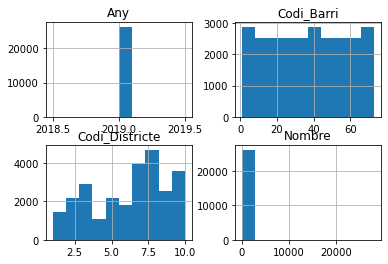

In [8]:
data.hist()
plt.show()

#### Column: 'Any'

- <font color = blue>***No variation in the 'year' column as the dataset refers to the living population of Barcelona on the first of January of 2019.***</font>
- <font color = blue>***May be drop the column***</font>

#### Column 'Codi_Districte'

In [9]:
data.groupby('Nom_Districte')['Codi_Districte'].std()

Nom_Districte
Ciutat Vella           0.0
Eixample               0.0
Gràcia                 0.0
Horta-Guinardó         0.0
Les Corts              0.0
Nou Barris             0.0
Sant Andreu            0.0
Sant Martí             0.0
Sants-Montjuïc         0.0
Sarrià-Sant Gervasi    0.0
Name: Codi_Districte, dtype: float64

- <font color = blue>***No variance of Codi_Districte inside each Nom_Districte***</font>
- <font color = blue>***Codi_Districte seems to be a code to identify each Nom_Districte***</font>
- <font color = blue>***May be useful to keep Codi_Districte to avoid encoding later or may be drop the column as the objective of the project doesn't need categorical data encoding***</font>

#### Column 'Codi_Barri'

In [10]:
data.groupby('Nom_Barri')['Codi_Barri'].std()

Nom_Barri
Baró de Viver                    0.0
Can Baró                         0.0
Can Peguera                      0.0
Canyelles                        0.0
Ciutat Meridiana                 0.0
                                ... 
la Vila Olímpica del Poblenou    0.0
la Vila de Gràcia                0.0
les Corts                        0.0
les Roquetes                     0.0
les Tres Torres                  0.0
Name: Codi_Barri, Length: 73, dtype: float64

<font color = blue>***Same conclusions as Codi_Districte***</font>

#### Column 'Nombre'

In [11]:
data['Nombre'].describe()

count    26280.000000
mean        62.281659
std        805.497248
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max      28002.000000
Name: Nombre, dtype: float64

In [12]:
data.groupby(['Sexe','Nacionalitat'])['Nombre'].sum()

Sexe  Nacionalitat          
Dona  Afganistan                  18
      Albània                    173
      Alemanya                  3564
      Algèria                    666
      Altres països d'Europa       4
                                ... 
Home  Xipre                       65
      Zimbàbue                     4
      Zàmbia                       2
      Àustria                    344
      Índia                     4825
Name: Nombre, Length: 360, dtype: int64

In [13]:
data.groupby(['Sexe','Nom_Districte'])['Nombre'].sum()

Sexe  Nom_Districte      
Dona  Ciutat Vella            48626
      Eixample               141840
      Gràcia                  65889
      Horta-Guinardó          91052
      Les Corts               43919
      Nou Barris              90636
      Sant Andreu             78733
      Sant Martí             123722
      Sants-Montjuïc          95950
      Sarrià-Sant Gervasi     80776
Home  Ciutat Vella            54803
      Eixample               124070
      Gràcia                  55909
      Horta-Guinardó          80443
      Les Corts               38055
      Nou Barris              80033
      Sant Andreu             71088
      Sant Martí             114593
      Sants-Montjuïc          88141
      Sarrià-Sant Gervasi     68484
Name: Nombre, dtype: int64

<font color = blue>***'Nombre' column seems to be the quantity of resident for the given gender, district, neighborhood and nationality***</font>

### Categorical variables

#### 'Nom_Districte' column

In [14]:
data['Nom_Districte'].value_counts()

Nou Barris             4680
Horta-Guinardó         3960
Sant Martí             3600
Sants-Montjuïc         2880
Sant Andreu            2520
Sarrià-Sant Gervasi    2160
Eixample               2160
Gràcia                 1800
Ciutat Vella           1440
Les Corts              1080
Name: Nom_Districte, dtype: int64

In [15]:
len(data['Nom_Districte'].unique().tolist())

10

- <font color = blue>***10 unique districts are present in the dataset***</font>
- <font color = blue>***The 10 districts are homogeneously represented***</font>

#### 'Nom_Barri' column

In [16]:
data['Nom_Barri'].unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

In [17]:
len(data['Nom_Barri'].unique())

73

In [18]:
data.groupby('Nom_Districte')['Nom_Barri'].nunique()

Nom_Districte
Ciutat Vella            4
Eixample                6
Gràcia                  5
Horta-Guinardó         11
Les Corts               3
Nou Barris             13
Sant Andreu             7
Sant Martí             10
Sants-Montjuïc          8
Sarrià-Sant Gervasi     6
Name: Nom_Barri, dtype: int64

In [19]:
data.groupby('Nom_Districte')['Nom_Barri'].unique()

Nom_Districte
Ciutat Vella           [el Raval, el Barri Gòtic, la Barceloneta, San...
Eixample               [el Fort Pienc, la Sagrada Família, la Dreta d...
Gràcia                 [Vallcarca i els Penitents, el Coll, la Salut,...
Horta-Guinardó         [el Baix Guinardó, Can Baró, el Guinardó, la F...
Les Corts              [les Corts, la Maternitat i Sant Ramon, Pedral...
Nou Barris             [Vilapicina i la Torre Llobeta, Porta, el Turó...
Sant Andreu            [la Trinitat Vella, Baró de Viver, el Bon Past...
Sant Martí             [el Camp de l'Arpa del Clot, el Clot, el Parc ...
Sants-Montjuïc         [el Poble Sec, la Marina del Prat Vermell, la ...
Sarrià-Sant Gervasi    [Vallvidrera, el Tibidabo i les Planes, Sarrià...
Name: Nom_Barri, dtype: object

- <font color = blue>***There are 73 different neighborhoods in Barcelona***</font>
- <font color = blue>***Some District have more then 10 neighborhoods***</font>
- <font color = blue>***Might be wise to focus on District rather than neighborhood to answer the questions***</font>

#### Column 'Sexe'

In [20]:
data.groupby(['Sexe'])['Nombre'].count()

Sexe
Dona    13140
Home    13140
Name: Nombre, dtype: int64

- <font color = blue>***We have an equal number of male and female which seems strange***</font>
- <font color = blue>***Column head and categories of the column to be translated and renamed***</font>

#### Column 'Nacionalitat'

In [21]:
data.groupby('Nacionalitat')['Nombre'].nunique()

Nacionalitat
Afganistan                 9
Albània                   13
Alemanya                  80
Algèria                   35
Altres països d'Europa     3
                          ..
Xipre                      8
Zimbàbue                   2
Zàmbia                     3
Àustria                   23
Índia                     75
Name: Nombre, Length: 180, dtype: int64

- <font color = blue>***Seems we have 180 different nationalities living in Barcelona***</font>
- <font color = blue>***Column head and nationalities to be translated in proper english***</font>
- <font color = blue>***May be focus on the top 10 of the nationalities represented in Barcelona to answer the questions***</font>
- <font color = blue>***In this case, drop the other nationalities from the dataset***</font>

In [22]:
data.groupby('Nacionalitat')['Nombre'].sum().nlargest(10)

Nacionalitat
Espanya       1316380
Itàlia          34287
Xina            21327
Pakistan        20437
França          15757
Marroc, el      14269
Colòmbia        11796
Hondures        11593
Perú            10240
Veneçuela       10012
Name: Nombre, dtype: int64

## Dataset cleaning

### Create a copy of the original dataset

In [23]:
df_nat = data.copy()

### Drop unwanted columns: 'Any', 'Codi_Barri', 'Codi_Districte'

In [24]:
df_nat = data.drop(['Any', 'Codi_Barri', 'Codi_Districte'],axis=1)
df_nat.head()

,Nom_Districte,Nom_Barri,Sexe,Nacionalitat,Nombre
0,Ciutat Vella,el Raval,Dona,Espanya,11666
1,Ciutat Vella,el Barri Gòtic,Dona,Espanya,4214
2,Ciutat Vella,la Barceloneta,Dona,Espanya,4801
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Dona,Espanya,6570
4,Eixample,el Fort Pienc,Dona,Espanya,13074


### Rename columns header

In [25]:
df_nat.columns.tolist()

['Nom_Districte', 'Nom_Barri', 'Sexe', 'Nacionalitat', 'Nombre']

In [26]:
col_names = ['District_Name', 'Neighbor_Name', 'Gender', 'Nationality', 'Residents_numb']
df_nat.columns = col_names

In [27]:
df_nat.head()

,District_Name,Neighbor_Name,Gender,Nationality,Residents_numb
0,Ciutat Vella,el Raval,Dona,Espanya,11666
1,Ciutat Vella,el Barri Gòtic,Dona,Espanya,4214
2,Ciutat Vella,la Barceloneta,Dona,Espanya,4801
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Dona,Espanya,6570
4,Eixample,el Fort Pienc,Dona,Espanya,13074


### Drop Nationalities that are not in top 10

In [28]:
top_nations = df_nat.groupby('Nationality')['Residents_numb'].sum().nlargest(10)

In [29]:
top_nations = list(top_nations.index)
top_nations

['Espanya',
 'Itàlia',
 'Xina',
 'Pakistan',
 'França',
 'Marroc, el',
 'Colòmbia',
 'Hondures',
 'Perú',
 'Veneçuela']

In [30]:
df_nat = df_nat[df_nat['Nationality'].isin(top_nations)]
df_nat

,District_Name,Neighbor_Name,Gender,Nationality,Residents_numb
0,Ciutat Vella,el Raval,Dona,Espanya,11666
1,Ciutat Vella,el Barri Gòtic,Dona,Espanya,4214
2,Ciutat Vella,la Barceloneta,Dona,Espanya,4801
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Dona,Espanya,6570
4,Eixample,el Fort Pienc,Dona,Espanya,13074
...,...,...,...,...,...
22917,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,Home,Pakistan,36
22918,Sant Martí,el Besòs i el Maresme,Home,Pakistan,1667
22919,Sant Martí,Provençals del Poblenou,Home,Pakistan,115
22920,Sant Martí,Sant Martí de Provençals,Home,Pakistan,86


In [31]:
df_nat['Nationality'].unique()

array(['Espanya', 'Itàlia', 'França', 'Marroc, el', 'Colòmbia',
       'Hondures', 'Perú', 'Veneçuela', 'Xina', 'Pakistan'], dtype=object)

### Rename categories in 'Nationalities'

In [32]:
df_nat['Nationality'] = df_nat['Nationality'].astype(dtype='category')

In [33]:
df_nat['Nationality'].cat.categories

Index(['Colòmbia', 'Espanya', 'França', 'Hondures', 'Itàlia', 'Marroc, el',
       'Pakistan', 'Perú', 'Veneçuela', 'Xina'],
      dtype='object')

In [34]:
df_nat['Nationality'] = df_nat['Nationality'].replace(['Colòmbia', 'Espanya', 'França', 'Hondures', 'Itàlia', 'Marroc, el',
       'Pakistan', 'Perú', 'Veneçuela', 'Xina'],['Colombia', 'Spain', 'France', 'Honduras', 'Italy', 'Morocco',
       'Pakistan', 'Peru', 'Venezuela', 'China'])

In [35]:
df_nat

,District_Name,Neighbor_Name,Gender,Nationality,Residents_numb
0,Ciutat Vella,el Raval,Dona,Spain,11666
1,Ciutat Vella,el Barri Gòtic,Dona,Spain,4214
2,Ciutat Vella,la Barceloneta,Dona,Spain,4801
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Dona,Spain,6570
4,Eixample,el Fort Pienc,Dona,Spain,13074
...,...,...,...,...,...
22917,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,Home,Pakistan,36
22918,Sant Martí,el Besòs i el Maresme,Home,Pakistan,1667
22919,Sant Martí,Provençals del Poblenou,Home,Pakistan,115
22920,Sant Martí,Sant Martí de Provençals,Home,Pakistan,86


### Rename categories in 'Gender'

In [36]:
df_nat['Gender'] = df_nat['Gender'].replace(['Dona','Home'],['Female','Male'])
df_nat

,District_Name,Neighbor_Name,Gender,Nationality,Residents_numb
0,Ciutat Vella,el Raval,Female,Spain,11666
1,Ciutat Vella,el Barri Gòtic,Female,Spain,4214
2,Ciutat Vella,la Barceloneta,Female,Spain,4801
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Female,Spain,6570
4,Eixample,el Fort Pienc,Female,Spain,13074
...,...,...,...,...,...
22917,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,Male,Pakistan,36
22918,Sant Martí,el Besòs i el Maresme,Male,Pakistan,1667
22919,Sant Martí,Provençals del Poblenou,Male,Pakistan,115
22920,Sant Martí,Sant Martí de Provençals,Male,Pakistan,86


In [37]:
df_nat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 22921
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District_Name   1460 non-null   object
 1   Neighbor_Name   1460 non-null   object
 2   Gender          1460 non-null   object
 3   Nationality     1460 non-null   object
 4   Residents_numb  1460 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 45.6+ KB


## Dataset analysis

### Question 1: What are the top3 spoken languages in Barcelona (supposing each nationality has only one exclusive official language)?

In [38]:
df_nat.groupby('Nationality')['Residents_numb'].sum().nlargest(4)

Nationality
Spain       1316380
Italy         34287
China         21327
Pakistan      20437
Name: Residents_numb, dtype: int64

<font color = blue>***Assuming each nationality speaks only one language, the top 3 languages spoken in Barcelona area (after Spanish and Catalan) are Italian, Chineese and Punjabi***</font>

### Question 2: Where is Chinatown in Barcelona?

In [39]:
chinatown = df_nat[df_nat['Nationality']=="China"].groupby('District_Name')['Residents_numb'].sum()

In [40]:
chinatown.sort_values(ascending=False)

District_Name
Eixample               5897
Sant Martí             4205
Sants-Montjuïc         2900
Sant Andreu            1968
Nou Barris             1765
Horta-Guinardó         1128
Gràcia                  968
Ciutat Vella            868
Les Corts               861
Sarrià-Sant Gervasi     767
Name: Residents_numb, dtype: int64

<font color = blue>***Chinatown can be associated to Eixample district in Barcelona***</font>

### Question 3: If you want to meet the love of your life, where should you go according to your sex preferences?

In [41]:
gender_prop = df_nat.groupby(['Gender','District_Name'])['Residents_numb'].sum().nlargest(4)
gender_prop
#crossing Gender and District with the amount of residents.
#Getting the Top4

Gender  District_Name
Female  Eixample         125463
        Sant Martí       112503
Male    Eixample         109462
        Sant Martí       103820
Name: Residents_numb, dtype: int64

In [58]:
bcn_pop = data['Nombre'].sum()
bcn_pop
#number of people living in BCN according to our DB

1636762

In [70]:
def percent(x, lst):
    perc_lst = []
    for i in lst:
        perc_lst.append(i * 100 / x)
    return perc_lst

#define a function to get a percent out of a list and the sum of the list

In [100]:
top_distr_lst = ('Eixample_Female', 'Sant Martí_Female', 'Eixample_Male', 'Sant Martí_Male')
percent_distr_gender = list(percent(bcn_pop, gend_res_num))
percent_distr_gender = [round(elem, 2) for elem in percent_distr_gender]
percent_distr_gender
#getting the percent of top4 districts by gender

[7.67, 6.87, 6.69, 6.34]

In [112]:
fancy_dict = dict(zip(top_distr_lst, percent_distr_gender))
fancy_dict
#percent comparing with whole BCN city

{'Eixample_Female': 7.67,
 'Sant Martí_Female': 6.87,
 'Eixample_Male': 6.69,
 'Sant Martí_Male': 6.34}

In [113]:
nation_is_china = df_nat[df_nat['Nationality'] == 'China']
gender_nat_prop = nation_is_china.groupby(['Gender','District_Name'])['Residents_numb'].sum().nlargest(4)
gender_nat_prop
#define a DataFrame only for Chinese
#find where man/woman are mostly living

Gender  District_Name
Female  Eixample         3124
Male    Eixample         2773
Female  Sant Martí       2192
Male    Sant Martí       2013
Name: Residents_numb, dtype: int64

In [124]:
distr_is_Eixample = df_nat[df_nat['District_Name'] == 'Eixample']
eixample_prop = distr_is_Eixample.groupby('Gender')['Residents_numb'].sum().nlargest(4)
eixample_prop
#define a DataFrame only for Eixample District
#find how many man/woman are living in this district

Gender
Female    125463
Male      109462
Name: Residents_numb, dtype: int64

In [125]:
total_ppl_eixample = 109462+125463
man_woman = ['man', 'woman']
lst_man_wman = [109462, 125463]
percent_man = percent(total_ppl_eixample, lst_man_wman)
percent_man_wman = [round(elem, 2) for elem in percent_man]

fancy_dict_eix = dict(zip(man_woman, percent_man_wman))
fancy_dict_eix
#understanding the distribution of man/woman in l'Eixample

{'man': 46.59, 'woman': 53.41}

In [126]:
distr_is_StMarti = df_nat[df_nat['District_Name'] == 'Sant Martí']
StMarti_prop = distr_is_StMarti.groupby('Gender')['Residents_numb'].sum().nlargest(4)
StMarti_prop
#define a DataFrame only for Sant Martí District
#find how many man/woman are living in this district

Gender
Female    112503
Male      103820
Name: Residents_numb, dtype: int64

In [129]:
total_ppl_StMarti = 103820+112503
lst_man_wman_SM = [103820, 112503]
percent_man_SM = percent(total_ppl_StMarti, lst_man_wman_SM)
percent_man_wman_SM = [round(elem, 2) for elem in percent_man_SM]

fancy_dict_SM = dict(zip(man_woman, percent_man_wman_SM))
fancy_dict_SM
#understanding the distribution of man/woman in Sant Martí

{'man': 47.99, 'woman': 52.01}

<font color = blue>***We can conclude from the extracted Data that:***</font><br>
<font color = red>***. If you fancy boys or girls, your districts are Eixample and Sant Martí<br>
    . Girls are more common in those neighborhoods<br>
    . If you are looking for Mr or Mss Right in China, Eixample and Sant Martí are still your neighborhoods<br>
    . Those who like girls will be slightly more happy with those two districts***</font>